In [28]:
import os
from os.path import join as pjoin
from tifffile import imread, imwrite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
from NatMovie_utils import *
from wfield import *
from cor470 import enhance_df_f

sys.path.append('./ICA')
from jadeR import jadeR
from jadeR_cupy import jadeR_cupy

In [29]:
path_summary = '/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary2'
os.makedirs(path_summary, exist_ok=True)

In [30]:
warped_height, warped_width = (540, 640)

ccf_regions_reference,proj,brain_outline = allen_load_reference('dorsal_cortex')
lmarks = load_allen_landmarks(None)

# this converts to warped image space
ccf_regions = allen_transform_regions(None,ccf_regions_reference,
                                      resolution = lmarks['resolution'],
                                        bregma_offset = lmarks['bregma_offset'])

atlas, areanames, brain_mask = atlas_from_landmarks_file(landmarks_file=None, reference='dorsal_cortex', dims = [warped_height, warped_width], do_transform = None) 

In [31]:
all_area_snr_movie = np.load(pjoin(path_summary, 'natural-movie-series','all_area_snr.npy'))
all_area_snr_mvBar = np.load(pjoin(path_summary, 'moving-bar','all_area_snr.npy'))


In [32]:

area_list = ['MOB','FRP','MOp','MOs','SSp-n','SSp-m','SSp-un','PL','ACAd','RSPv','RSPd','RSPagl','VISC',
             'SSs','SSp-bfd','SSp-tr','SSp-ll','SSp-ul','TEa','AUDd','AUDp','AUDpo','AUDv',
             'VISli','VISpor','VISpl','VISpm','VISl','VISal','VISrl','VISa','VISam','VISp']


/tmp/ipykernel_3909434/1392582158.py:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='areas', y='snr', hue='type', data=df_combined, split=True, scale='width', inner='quartile', palette={'movie': 'tab:red', 'mvBar': 'steelblue'})


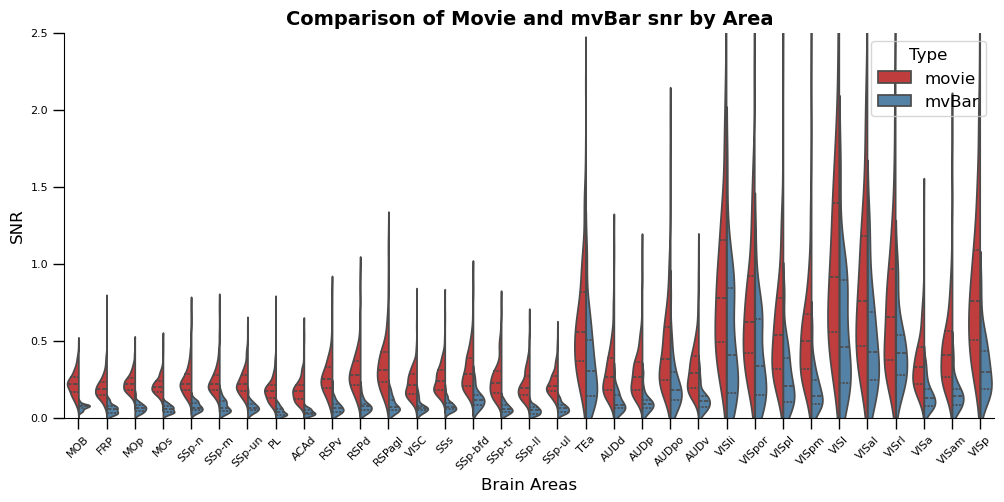

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 将两组数据分别转换为 DataFrame 并展开
df_movie = pd.DataFrame(all_area_snr_movie.reshape(33, -1).T, columns=area_list)
df_movie_long = df_movie.melt(var_name='areas', value_name='snr')  # 转换为长格式
df_movie_long['type'] = 'movie'  # 添加类型标识

df_bar = pd.DataFrame(all_area_snr_mvBar.reshape(33, -1).T, columns=area_list)
df_bar_long = df_bar.melt(var_name='areas', value_name='snr')  # 转换为长格式
df_bar_long['type'] = 'mvBar'  # 添加类型标识

# 合并两组长格式数据
df_combined = pd.concat([df_movie_long, df_bar_long], axis=0)

# 绘制提琴图
plt.figure(figsize=(12, 5))
sns.violinplot(x='areas', y='snr', hue='type', data=df_combined, split=True, scale='width', inner='quartile', palette={'movie': 'tab:red', 'mvBar': 'steelblue'})
plt.title('Comparison of Movie and mvBar snr by Area')
plt.xlabel('Brain Areas')
plt.ylabel('SNR')
plt.ylim(0,2.5)
plt.xticks(rotation=45)
plt.legend(title='Type')
fig = plt.gcf()  # 获取当前图形对象
fig.set_facecolor('white')  # 设置背景为白色
plt.savefig(pjoin(path_summary, 'comparison_movie_bar_snr.png'), facecolor='white', transparent=False, bbox_inches='tight', pad_inches=0)
plt.show()


In [34]:
all_area_std_movie = np.load(pjoin(path_summary, 'natural-movie-series','all_area_std.npy'))
all_area_std_mvBar = np.load(pjoin(path_summary, 'moving-bar','all_area_std.npy'))
all_area_std_baseline = np.load(pjoin(path_summary, 'baseline','all_area_std.npy'))


/tmp/ipykernel_3909434/3386768720.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='areas', y='std', hue='type', data=df_combined, scale='width', inner='quartile', palette={'movie': 'tab:red', 'mvBar': 'steelblue', 'baseline': 'grey'})


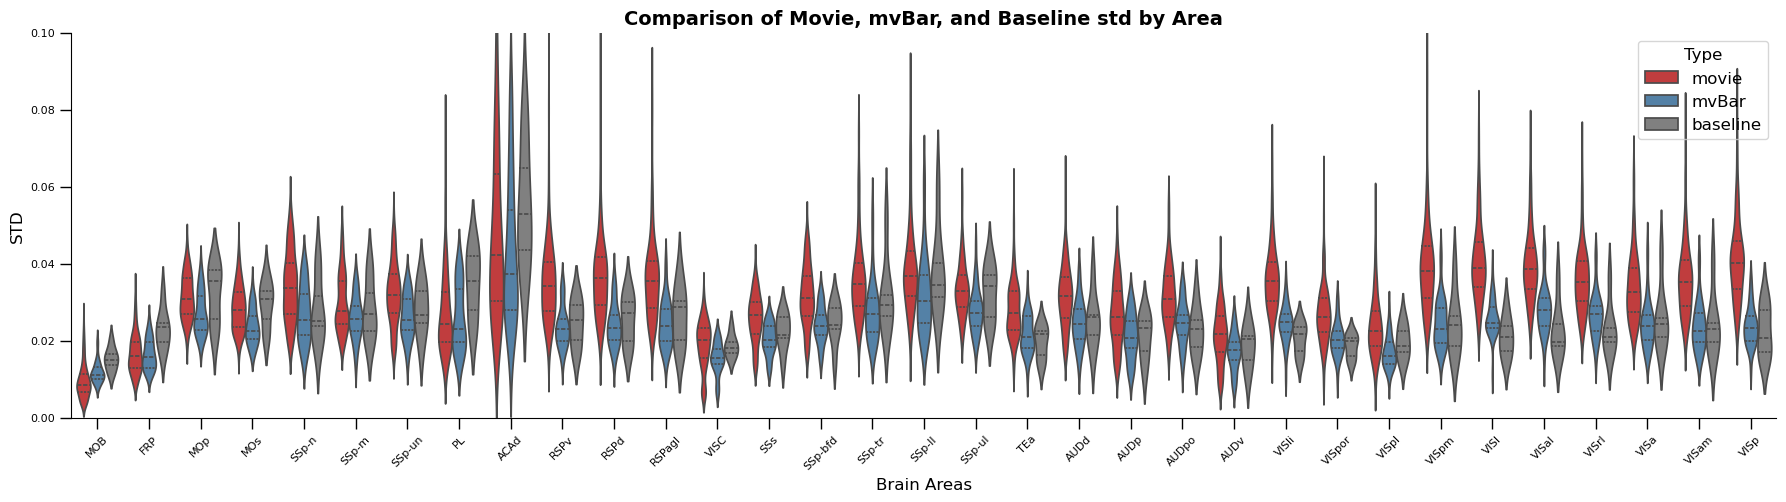

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 将三组数据分别转换为 DataFrame 并展开
df_movie = pd.DataFrame(all_area_std_movie.reshape(33, -1).T, columns=area_list)
df_movie_long = df_movie.melt(var_name='areas', value_name='std')  # 转换为长格式
df_movie_long['type'] = 'movie'  # 添加类型标识

df_mvBar = pd.DataFrame(all_area_std_mvBar.reshape(33, -1).T, columns=area_list)
df_mvBar_long = df_mvBar.melt(var_name='areas', value_name='std')  # 转换为长格式
df_mvBar_long['type'] = 'mvBar'  # 添加类型标识

df_baseline = pd.DataFrame(all_area_std_baseline.reshape(33, -1).T, columns=area_list)
df_baseline_long = df_baseline.melt(var_name='areas', value_name='std')  # 转换为长格式
df_baseline_long['type'] = 'baseline'  # 添加类型标识

# 合并三组长格式数据
df_combined = pd.concat([df_movie_long, df_mvBar_long, df_baseline_long], axis=0)

# 绘制小提琴图
plt.figure(figsize=(22, 5))
sns.violinplot(x='areas', y='std', hue='type', data=df_combined, scale='width', inner='quartile', palette={'movie': 'tab:red', 'mvBar': 'steelblue', 'baseline': 'grey'})
plt.title('Comparison of Movie, mvBar, and Baseline std by Area')
plt.xlabel('Brain Areas')
plt.ylabel('STD')
plt.ylim(0, 0.1)  # 设置 y 轴范围
plt.xticks(rotation=45)
plt.legend(title='Type')
fig = plt.gcf()  # 获取当前图形对象
fig.set_facecolor('white')  # 设置背景为白色
plt.savefig(pjoin(path_summary, 'comparison_movie_mvBar_baseline_std.png'), facecolor='white', transparent=False, bbox_inches='tight', pad_inches=0)
plt.show()


/tmp/ipykernel_3909434/6553812.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='areas', x='std', hue='type', data=df_combined, scale='width', inner='quartile', orient='h',


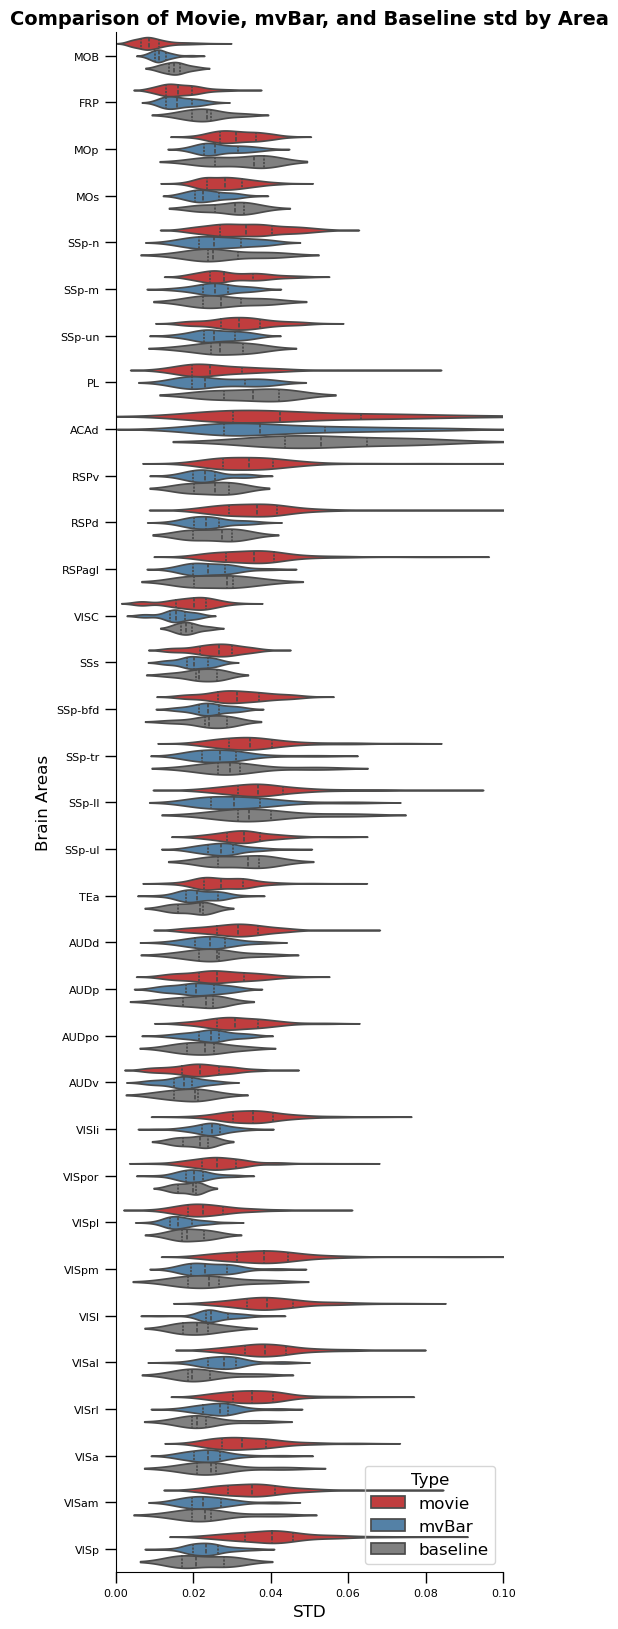

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 将三组数据分别转换为 DataFrame 并展开
df_movie = pd.DataFrame(all_area_std_movie.reshape(33, -1).T, columns=area_list)
df_movie_long = df_movie.melt(var_name='areas', value_name='std')  # 转换为长格式
df_movie_long['type'] = 'movie'  # 添加类型标识

df_mvBar = pd.DataFrame(all_area_std_mvBar.reshape(33, -1).T, columns=area_list)
df_mvBar_long = df_mvBar.melt(var_name='areas', value_name='std')  # 转换为长格式
df_mvBar_long['type'] = 'mvBar'  # 添加类型标识

df_baseline = pd.DataFrame(all_area_std_baseline.reshape(33, -1).T, columns=area_list)
df_baseline_long = df_baseline.melt(var_name='areas', value_name='std')  # 转换为长格式
df_baseline_long['type'] = 'baseline'  # 添加类型标识

# 合并三组长格式数据
df_combined = pd.concat([df_movie_long, df_mvBar_long, df_baseline_long], axis=0)

# 绘制横向提琴图
plt.figure(figsize=(5, 20))
sns.violinplot(y='areas', x='std', hue='type', data=df_combined, scale='width', inner='quartile', orient='h', 
               palette={'movie': 'tab:red', 'mvBar': 'steelblue', 'baseline': 'grey'})  # 使用 orient='h' 实现横向绘图
plt.title('Comparison of Movie, mvBar, and Baseline std by Area')
plt.ylabel('Brain Areas')  # y 轴为脑区分组
plt.xlabel('STD')  # x 轴为分布数据
plt.xlim(0, 0.1)  # 设置 x 轴范围
plt.legend(title='Type', loc='lower right')  # 调整图例位置
fig = plt.gcf()  # 获取当前图形对象
fig.set_facecolor('white')  # 设置背景为白色
plt.savefig(pjoin(path_summary, 'comparison_movie_mvBar_baseline_std_horizontal.png'), facecolor='white', transparent=False, bbox_inches='tight', pad_inches=0)
plt.show()

